Image Data Analysis with GRU


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4806 - loss: 1.4954
Epoch 1: accuracy improved from -inf to 0.68082, saving model to mnist_modelgru.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.4815 - loss: 1.4932 - val_accuracy: 0.8697 - val_loss: 0.4205
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8946 - loss: 0.3555
Epoch 2: accuracy improved from 0.68082 to 0.91308, saving model to mnist_modelgru.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8946 - loss: 0.3554 - val_accuracy: 0.9416 - val_loss: 0.2087
Epoch 3/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9439 - loss: 0.1961
Epoch 3: accuracy improved from 0.91308 to 0.94875, saving model to mnist_modelgru.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9439 - loss: 0.1960 - val_accuracy: 0.9568 - val_loss: 0.1481
Epoch 4/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9572 - loss: 0.1461
Epoch 4: accuracy improved from

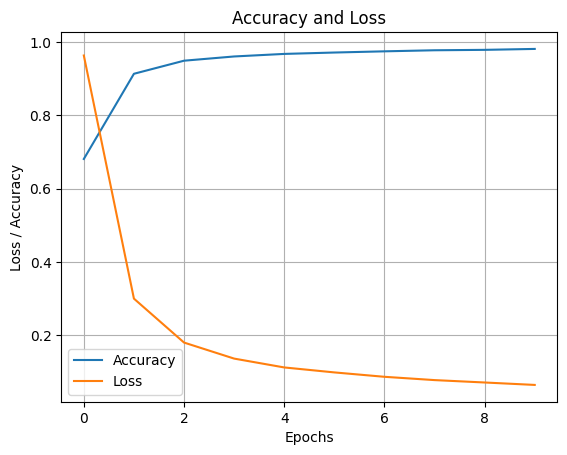

In [2]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with GRU")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(GRU(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_modelgru.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )

#Evaluation Metrics
scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])

# graph
his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):1000


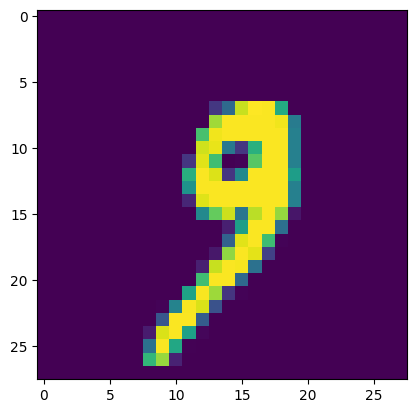

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
[[1.0952321e-05 1.4034253e-05 4.1085186e-06 4.1827335e-04 4.0549898e-04
  8.2082654e-05 8.1887646e-07 2.4356137e-03 5.8553513e-04 9.9604309e-01]]

The number is given below : 
[9]


In [5]:
# PREDICTION
from keras.models import load_model

# load model
model_pred_grb = load_model("mnist_modelgru.keras")
#load data
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_grb.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)